In [7]:
%load_ext autoreload
%autoreload 2

import sys
# currently not installable so import from parent dir
sys.path.append('..')
from fluxdataqaqc.data import Data
from fluxdataqaqc.qaqc import QaQc 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## create a ``Data`` object to read in time series data using a config file

In [29]:
config_path = 'fluxnet_config.ini'
d = Data(config_path)

In [13]:
# you can access all metadata and datain the config file as a list
d.config.items('METADATA')

[('climate_file_path', 'woodward_1.csv'),
 ('station_latitude', '36.4267'),
 ('station_longitude', '-99.42'),
 ('station_elevation', '611'),
 ('anemometer_height', '3'),
 ('missing_data_value', '-9999')]

In [15]:
# or as a dict, e.g. to access specific values by name
dict(d.config.items('METADATA'))['station_elevation']

'611'

In [20]:
# path to climate time series input and config files
print(d.climate_file, '\n', d.config_file)

/home/john/flux-data-qaqc/example_data/woodward_1.csv 
 /home/john/flux-data-qaqc/example_data/fluxnet_config.ini


In [16]:
# view header of input time series file
d.header

array(['TIMESTAMP', 'TA_F', 'TA_F_QC', 'SW_IN_POT', 'SW_IN_F',
       'SW_IN_F_QC', 'LW_IN_F', 'LW_IN_F_QC', 'VPD_F', 'VPD_F_QC', 'PA_F',
       'PA_F_QC', 'P_F', 'P_F_QC', 'WS_F', 'WS_F_QC', 'USTAR', 'USTAR_QC',
       'NETRAD', 'NETRAD_QC', 'PPFD_IN', 'PPFD_IN_QC', 'PPFD_OUT',
       'PPFD_OUT_QC', 'SW_OUT', 'SW_OUT_QC', 'LW_OUT', 'LW_OUT_QC',
       'CO2_F_MDS', 'CO2_F_MDS_QC', 'TS_F_MDS_1', 'TS_F_MDS_1_QC',
       'SWC_F_MDS_1', 'SWC_F_MDS_1_QC', 'G_F_MDS', 'G_F_MDS_QC',
       'LE_F_MDS', 'LE_F_MDS_QC', 'LE_CORR', 'LE_CORR_25', 'LE_CORR_75',
       'LE_RANDUNC', 'H_F_MDS', 'H_F_MDS_QC', 'H_CORR', 'H_CORR_25',
       'H_CORR_75', 'H_RANDUNC', 'NEE_VUT_REF', 'NEE_VUT_REF_QC',
       'NEE_VUT_REF_RANDUNC', 'NEE_VUT_25', 'NEE_VUT_50', 'NEE_VUT_75',
       'NEE_VUT_25_QC', 'NEE_VUT_50_QC', 'NEE_VUT_75_QC',
       'RECO_NT_VUT_REF', 'RECO_NT_VUT_25', 'RECO_NT_VUT_50',
       'RECO_NT_VUT_75', 'GPP_NT_VUT_REF', 'GPP_NT_VUT_25',
       'GPP_NT_VUT_50', 'GPP_NT_VUT_75', 'RECO_DT_VUT_REF',


# load date-indexed DataFrame using ``.df``

In [22]:
d.df.head()

,t_avg,sw_pot,sw_in,lw_in,vpd,ppt,ws,net_rad,sw_out,lw_out,g_flux,le_flux,le_flux_corr,h_flux,h_flux_corr
date,,,,,,,,,,,,,,,
2009-01-01,2.803,186.710,123.108,261.302,1.919,0.0,3.143,NaN,NaN,NaN,NaN,67.1459,43.8414,20.3876,13.3116
2009-01-02,2.518,187.329,121.842,268.946,0.992,0.0,2.093,NaN,NaN,NaN,NaN,92.8616,60.9673,32.6505,21.4364
2009-01-03,5.518,188.008,124.241,268.004,2.795,0.0,4.403,NaN,NaN,NaN,NaN,75.8029,50.3151,20.0569,13.3130
2009-01-04,-3.753,188.742,113.793,246.675,0.892,0.0,4.336,NaN,NaN,NaN,NaN,67.1459,45.0539,20.3876,13.6798
2009-01-05,-2.214,189.534,124.332,244.478,1.304,0.0,2.417,NaN,NaN,NaN,NaN,92.8616,62.6443,32.6505,22.0260


## you can modify the dataframe or assign new columns or even assign a new dataframe

In [24]:
x = d.df
x += 100
d.df = x
d.df *= 5
d.df.head()

,t_avg,sw_pot,sw_in,lw_in,vpd,ppt,ws,net_rad,sw_out,lw_out,g_flux,le_flux,le_flux_corr,h_flux,h_flux_corr
date,,,,,,,,,,,,,,,
2009-01-01,514.015,1433.550,1115.540,1806.510,509.595,500.0,515.715,NaN,NaN,NaN,NaN,835.7295,719.2070,601.9380,566.558
2009-01-02,512.590,1436.645,1109.210,1844.730,504.960,500.0,510.465,NaN,NaN,NaN,NaN,964.3080,804.8365,663.2525,607.182
2009-01-03,527.590,1440.040,1121.205,1840.020,513.975,500.0,522.015,NaN,NaN,NaN,NaN,879.0145,751.5755,600.2845,566.565
2009-01-04,481.235,1443.710,1068.965,1733.375,504.460,500.0,521.680,NaN,NaN,NaN,NaN,835.7295,725.2695,601.9380,568.399
2009-01-05,488.930,1447.670,1121.660,1722.390,506.520,500.0,512.085,NaN,NaN,NaN,NaN,964.3080,813.2215,663.2525,610.130


---
# using the `QaQc` class to correct energy balance closure

In [26]:
from fluxdataqaqc.qaqc import QaQc 

In [30]:
# read in data fresh and use it to create a QaQc instance
data = Data(config_path)
q = QaQc(data)

In [31]:
# data is not corrected yet:
q.corrected

False

In [32]:
# data has not changed...
q.df.head()

,t_avg,sw_pot,sw_in,lw_in,vpd,ppt,ws,net_rad,sw_out,lw_out,g_flux,le_flux,le_flux_corr,h_flux,h_flux_corr
date,,,,,,,,,,,,,,,
2009-01-01,2.803,186.710,123.108,261.302,1.919,0.0,3.143,NaN,NaN,NaN,NaN,67.1459,43.8414,20.3876,13.3116
2009-01-02,2.518,187.329,121.842,268.946,0.992,0.0,2.093,NaN,NaN,NaN,NaN,92.8616,60.9673,32.6505,21.4364
2009-01-03,5.518,188.008,124.241,268.004,2.795,0.0,4.403,NaN,NaN,NaN,NaN,75.8029,50.3151,20.0569,13.3130
2009-01-04,-3.753,188.742,113.793,246.675,0.892,0.0,4.336,NaN,NaN,NaN,NaN,67.1459,45.0539,20.3876,13.6798
2009-01-05,-2.214,189.534,124.332,244.478,1.304,0.0,2.417,NaN,NaN,NaN,NaN,92.8616,62.6443,32.6505,22.0260


In [41]:
# note the original columns
import pprint
pprint.pprint(', '.join(q.df.columns))

('t_avg, sw_pot, sw_in, lw_in, vpd, ppt, ws, net_rad, sw_out, lw_out, g_flux, '
 'le_flux, le_flux_corr, h_flux, h_flux_corr')


# correct energy balance using `flux-data-qaqc` methods

In [44]:
q.correct_data()
q.corrected

True

In [45]:
# now we have original data plus adjusted variables, energy balance ratios, and others
pprint.pprint(', '.join(q.df.columns))

('t_avg, sw_pot, sw_in, lw_in, vpd, ppt, ws, net_rad, sw_out, lw_out, g_flux, '
 'le_flux, le_flux_corr, h_flux, h_flux_corr, energy, flux, bowen_ratio, '
 'le_flux_adj, h_flux_adj, flux_adj, et_reg, et_adj, et_corr, ebc_reg, '
 'ebc_adj, ebc_corr, rso')


In [46]:
q.df.head()

,t_avg,sw_pot,sw_in,lw_in,vpd,ppt,ws,net_rad,sw_out,lw_out,...,le_flux_adj,h_flux_adj,flux_adj,et_reg,et_adj,et_corr,ebc_reg,ebc_adj,ebc_corr,rso
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,2.803,186.710,123.108,261.302,1.919,0.0,3.143,NaN,NaN,NaN,...,67.1459,20.3876,87.5335,2.320562,2.320562,1.515159,NaN,NaN,NaN,NaN
2009-01-02,2.518,187.329,121.842,268.946,0.992,0.0,2.093,NaN,NaN,NaN,...,92.8616,32.6505,125.5121,3.209297,3.209297,2.107030,NaN,NaN,NaN,NaN
2009-01-03,5.518,188.008,124.241,268.004,2.795,0.0,4.403,NaN,NaN,NaN,...,75.8029,20.0569,95.8598,2.619748,2.619748,1.738890,NaN,NaN,NaN,NaN
2009-01-04,-3.753,188.742,113.793,246.675,0.892,0.0,4.336,NaN,NaN,NaN,...,67.1459,20.3876,87.5335,2.320562,2.320562,1.557063,NaN,NaN,NaN,NaN
2009-01-05,-2.214,189.534,124.332,244.478,1.304,0.0,2.417,NaN,NaN,NaN,...,92.8616,32.6505,125.5121,3.209297,3.209297,2.164987,NaN,NaN,NaN,NaN


## temporally aggregate to monthly data using sums for ET and P, and means for all others

In [47]:
q.monthly_df

,energy,flux,flux_adj,bowen_ratio,et_reg,et_adj,et_corr,ebc_reg,ebc_adj,ebc_corr,...,net_rad,sw_out,lw_out,g_flux,le_flux,le_flux_corr,le_flux_adj,h_flux,h_flux_corr,h_flux_adj
month,,,,,,,,,,,,,,,,,,,,,
1,17.876729,46.662122,43.370733,1.534273,120.652934,121.605428,89.461644,1.305502,1.153630,0.969754,...,14.386410,25.743918,329.095610,-2.749864,28.154153,20.875720,28.376416,18.507969,13.812101,20.344747
2,32.694883,55.299881,51.833995,0.726948,138.893368,141.753085,114.360416,-1.000368,-0.864297,-0.898011,...,30.828760,35.721401,334.565511,1.811261,35.565534,29.283538,36.297803,19.734347,16.376897,21.252482
3,63.758370,80.649884,74.048754,1.038472,211.046481,214.389954,175.945850,1.319864,1.366852,1.113213,...,65.838845,36.517000,380.248221,4.804328,49.247331,41.056659,50.027524,31.402554,26.095994,32.434427
4,91.693649,99.086055,95.046924,0.959166,267.646215,280.928790,232.310442,1.570164,1.638565,1.332671,...,94.778130,45.948577,411.897856,5.673464,64.536607,56.016214,67.739388,34.549448,30.205438,36.453200
5,114.244790,126.245714,120.631066,1.153096,356.730145,368.993094,320.511991,1.106427,1.173741,1.026050,...,119.611091,52.802948,439.411529,5.929934,83.242361,74.790918,86.103899,43.003353,38.558064,45.041334
6,122.622520,133.968734,125.257223,1.315505,332.643252,342.539551,293.036516,1.108298,1.167884,1.005100,...,131.265099,57.073122,485.798846,8.587371,80.209118,70.658882,82.595378,53.759616,50.635681,56.882989
7,115.506270,129.529852,115.628920,2.015129,280.723484,285.696323,250.614402,1.134082,1.157619,1.049337,...,122.434107,56.923059,499.208759,6.927838,65.506339,58.480436,66.666742,64.023514,61.029125,65.821242
8,113.848370,116.501736,114.246632,2.134416,232.896513,241.548167,224.175446,1.042127,1.099075,1.024971,...,116.965341,49.809506,486.279484,3.116971,54.345998,52.310952,56.364846,62.155739,62.478196,67.010280
9,83.936247,90.945156,85.372172,3.229314,139.780206,143.966421,129.467298,1.427241,1.476342,1.319342,...,83.267397,39.666376,448.748586,-0.668850,33.704718,31.218002,34.714125,57.240438,54.822662,59.829184


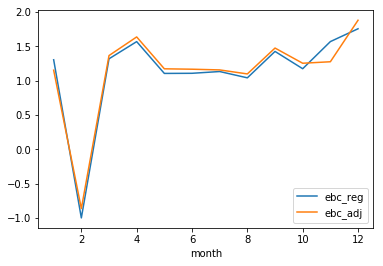

In [53]:
%matplotlib inline
# compate monthly energy balance correction ratio with raw data and corrected
q.monthly_df[['ebc_reg','ebc_adj']].plot(legend=True)